### **Useful code for Ariane Meli Essay on the topic : Hierarchical Time Series Forecasting**

In [ ]:
#Useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [ ]:
#import the datasets

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/brazilfireLstm/Fires_Month_Biomes_total.csv")
df1= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/brazilfireLstm/fire_month_per_municipality_final.csv")

In [ ]:
#lstm for the series at the bottom level

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import time
time_start=time.time()

forecasts=[]
listrmse = []

#creates a dataset where X is the number of spot fire at a given time (t, t-1, t-2...) 
#and Y is the number of spot fire at the next time (t + 1).
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

for i in df1.columns:
  if i=="mes_ano" :
    continue
#Convert pandas dataframe to numpy array
  dataset = df1[i].values
  dataset = dataset.astype('float32') #COnvert values to float
# normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1)) 
  dataset = scaler.fit_transform(dataset.reshape(-1, 1))

# split into train and test sets
  train_size = int(len(dataset) * 0.66)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

  seq_size = 12 # Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.

  trainX, trainY = to_sequences(train, seq_size)
  testX, testY = to_sequences(test, seq_size)


######################################################
#Stacked LSTM with 1 hidden dense layer
# reshape input to be [samples, time steps, features]
  trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#
  model = Sequential()
  model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(None, seq_size)))
  model.add(LSTM(100, activation='relu'))
  model.add(Dense(32))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mean_squared_error')
#model.summary()
#print('Train...')

  history = model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)

  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)

# invert predictions back to prescaled values
#This is to compare with original input values
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])

# calculate root mean squared error
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  print('Train Score: %.2f RMSE for %s' % (trainScore, i))

  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  print('Test Score: %.2f RMSE for %s' % (testScore, i))
  listrmse.append(testScore)
  forecasts.append(testPredict[:,0])

# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset. 
  trainPredictPlot = np.empty_like(dataset)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

# shift test predictions for plotting
  testPredictPlot = np.empty_like(dataset)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
  plt.plot(scaler.inverse_transform(dataset))
  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.show()

NameError: ignored

In [ ]:
#lstm for the series of biomes with one hidden layer and 2 denses layer

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import time
time_start=time.time()

forecasts=[]
listrmse = []

#creates a dataset where X is the number of spot fire at a given time (t, t-1, t-2...) 
#and Y is the number of spot fire at the next time (t + 1).
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

for i in df.columns:
  if i=="mes_ano" :
    continue
#Convert pandas dataframe to numpy array
  dataset = df[i].values
  dataset = dataset.astype('float32') #COnvert values to float
# normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1)) 
  dataset = scaler.fit_transform(dataset.reshape(-1, 1))

# split into train and test sets
  train_size = int(len(dataset) * 0.66)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

  seq_size = 12 # Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.

  trainX, trainY = to_sequences(train, seq_size)
  testX, testY = to_sequences(test, seq_size)


######################################################
#Stacked LSTM with 1 hidden dense layer
# reshape input to be [samples, time steps, features]
  trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#
  model = Sequential()
  model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(None, seq_size)))
  model.add(LSTM(100, activation='relu'))
  model.add(Dense(32))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mean_squared_error')
#model.summary()
#print('Train...')

  history = model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)

  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)

# invert predictions back to prescaled values
#This is to compare with original input values
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])

# calculate root mean squared error
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  print('Train Score: %.2f RMSE for %s' % (trainScore, i))

  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  print('Test Score: %.2f RMSE for %s' % (testScore, i))
  listrmse.append(testScore)
  forecasts.append(testPredict[:,0])

# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset. 
  trainPredictPlot = np.empty_like(dataset)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

# shift test predictions for plotting
  testPredictPlot = np.empty_like(dataset)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
  plt.plot(scaler.inverse_transform(dataset))
  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.show()

In [ ]:
#list of forests from the lstm model

print(forecasts)

[array([19647.646  , 19565.033  , 19839.732  ,  9697.466  ,  9732.331  ,
        1718.9489 ,  1290.3661 ,   900.29376,   913.46375,  1733.8861 ,
        3706.3394 ,  4666.1167 , 13867.051  , 23636.87   , 11245.221  ,
       12086.145  ,  3934.4663 ,  1062.1351 ,   511.48224,   339.57306,
         923.54254,  1862.4893 ,   939.9986 , 10056.365  , 19257.623  ,
       23052.207  , 18758.133  , 14738.405  ], dtype=float32), array([1210.7539  , 2530.4058  , 3007.396   , 2048.325   , 1130.5624  ,
        199.34644 ,  131.55093 ,  113.9726  ,   98.818886,  117.510475,
        173.9198  ,  520.5757  , 1342.0851  , 2260.0361  , 2695.7546  ,
       2847.928   , 1755.6758  ,  354.0173  ,   99.98569 ,   73.06248 ,
         48.564163,   48.618958,  109.27595 ,  318.6159  , 1471.2767  ,
       2716.8628  , 3462.216   , 3359.162   ], dtype=float32), array([12711.652  , 12321.405  ,  9907.388  ,  2195.0173 ,  1522.9685 ,
        1317.5403 ,  1251.6073 ,  1402.9913 ,  1643.5405 ,  2419.2034 ,
        4

In [ ]:
#putting the forecast of each biome series in a data frame

forecasts_df = pd.DataFrame()
for i in range(len(forecasts)-1):
  forecasts_df.insert(i, str(i), forecasts[i])  

forecasts_df

,0,1,2,3,4,5
0,19647.646484,1210.753906,12711.652344,2967.270020,108.465706,596.921143
1,19565.033203,2530.405762,12321.405273,2638.916504,183.992645,769.388062
2,19839.732422,3007.395996,9907.387695,1284.976196,62.059540,764.459961
3,9697.465820,2048.324951,2195.017334,592.843933,38.197727,141.165909
4,9732.331055,1130.562378,1522.968506,523.527222,47.457237,106.947197
5,1718.948853,199.346436,1317.540283,498.898621,54.801960,103.922081
6,1290.366089,131.550934,1251.607300,516.915466,42.825111,107.915443
7,900.293762,113.972603,1402.991333,532.642029,36.025700,96.452835
8,913.463745,98.818886,1643.540527,556.875671,142.787750,96.294579
9,1733.886108,117.510475,2419.203369,568.070984,105.061409,94.306282


In [ ]:
#sum it to obtain reconcilled forecast for the top level
forecasts_df.loc[:, 'sum'] = forecasts_df.sum(axis=1)
forecasts_df

,0,1,2,3,4,5,sum
0,19647.646484,1210.753906,12711.652344,2967.270020,108.465706,596.921143,37242.710938
1,19565.033203,2530.405762,12321.405273,2638.916504,183.992645,769.388062,38009.140625
2,19839.732422,3007.395996,9907.387695,1284.976196,62.059540,764.459961,34866.011719
3,9697.465820,2048.324951,2195.017334,592.843933,38.197727,141.165909,14713.015625
4,9732.331055,1130.562378,1522.968506,523.527222,47.457237,106.947197,13063.793945
5,1718.948853,199.346436,1317.540283,498.898621,54.801960,103.922081,3893.458252
6,1290.366089,131.550934,1251.607300,516.915466,42.825111,107.915443,3341.180664
7,900.293762,113.972603,1402.991333,532.642029,36.025700,96.452835,3082.378418
8,913.463745,98.818886,1643.540527,556.875671,142.787750,96.294579,3451.781494
9,1733.886108,117.510475,2419.203369,568.070984,105.061409,94.306282,5038.038574


In [ ]:
#extract the reconcilled forecast
top = list(forecasts_df['sum'])
top

[37242.7109375,
 38009.140625,
 34866.01171875,
 14713.015625,
 13063.7939453125,
 3893.458251953125,
 3341.1806640625,
 3082.37841796875,
 3451.781494140625,
 5038.03857421875,
 8899.6845703125,
 15350.9736328125,
 28886.521484375,
 44388.02734375,
 33058.4375,
 17258.251953125,
 7191.01904296875,
 2235.36083984375,
 1190.597412109375,
 1216.833740234375,
 2088.313232421875,
 4281.48583984375,
 5249.46337890625,
 19022.529296875,
 36353.625,
 44968.3828125,
 42206.203125,
 21448.11328125]

In [ ]:
#predict value of the column total in df
print(testPredict[:,0])

[41022.18   42619.836  36153.438  14350.948   7429.5107  3755.822
  2915.0752  2842.229   3126.2485  4710.2583  6649.951  15568.185
 29976.299  46574.777  27743.36   11450.625   6083.328   2173.3953
  1255.3835   931.9404  1947.2872  3604.3784  4344.7017 19916.941
 39008.71   50397.97   38286.508  14725.143 ]


In [ ]:
#print the test data of the top level series

print(testY[0])

[22773.99885642 42250.99865121 19567.99917287 13013.99920733
  5113.00006841  4030.00007206  2864.9999222   5213.00000783
  2842.00003238  2963.00003394  7257.99999896 13393.99961881
 51934.99843189 53234.00093888 25612.99914728 20585.0003107
  7700.00041566  2866.00010339  2656.99993055  3879.99989556
  4117.00006214  4002.00007833  7109.00000366 15803.99944231
 50694.00162189 69328.99910342 41467.9987405  13463.00009034]


In [ ]:
#compute the rmse 
m= math.sqrt(mean_squared_error(testY[0], top))
print(m)

8682.379105041675


Needs to be tested.
Performance Metric for  Amazonia
RMSE for Amazonia = 5917.0100496517025
MAPE for Amazonia = 1.4183456702889021
MASE for Amazonia = inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


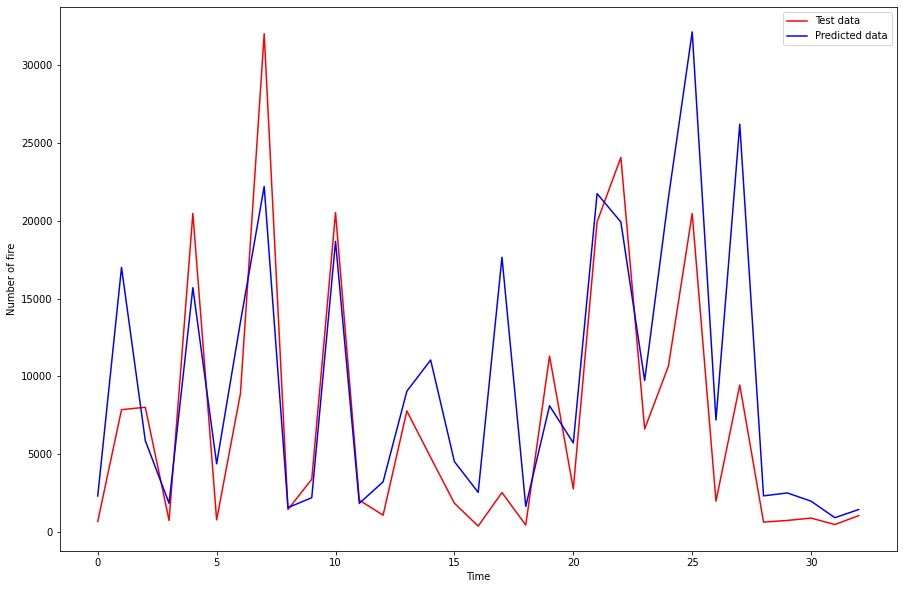

Needs to be tested.
Performance Metric for  Caatinga
RMSE for Caatinga = 1089.1905378594552
MAPE for Caatinga = 2.6614677599796006
MASE for Caatinga = inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


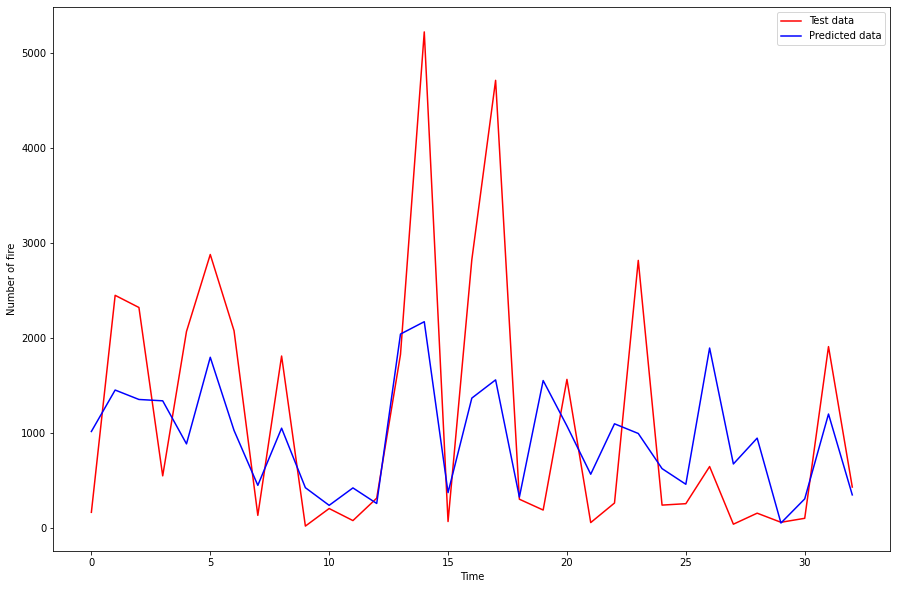

Needs to be tested.
Performance Metric for  Cerrado
RMSE for Cerrado = 6535.28899605864
MAPE for Cerrado = 2.2748877056457646
MASE for Cerrado = inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


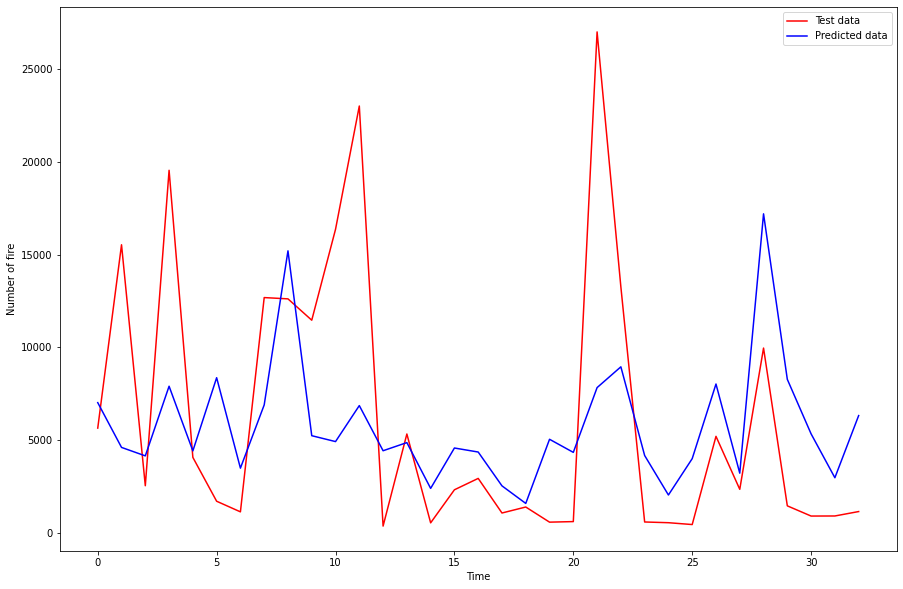

Needs to be tested.
Performance Metric for  Mata.Atlantica
RMSE for Mata.Atlantica = 1171.675853890932
MAPE for Mata.Atlantica = 1.1842752218834853
MASE for Mata.Atlantica = inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


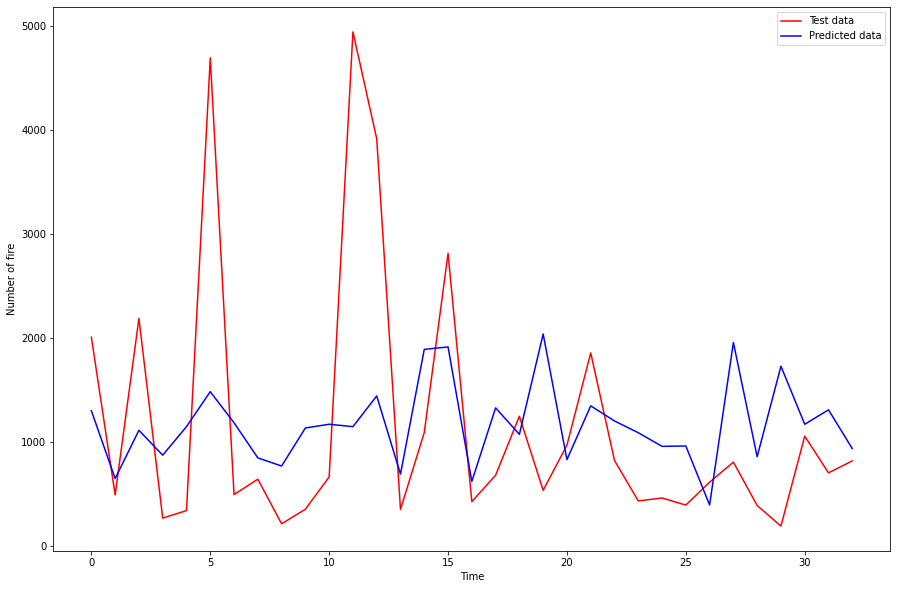

Needs to be tested.
Performance Metric for  Pampa
RMSE for Pampa = 82.75752113634422
MAPE for Pampa = 0.7337768722569429
MASE for Pampa = inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


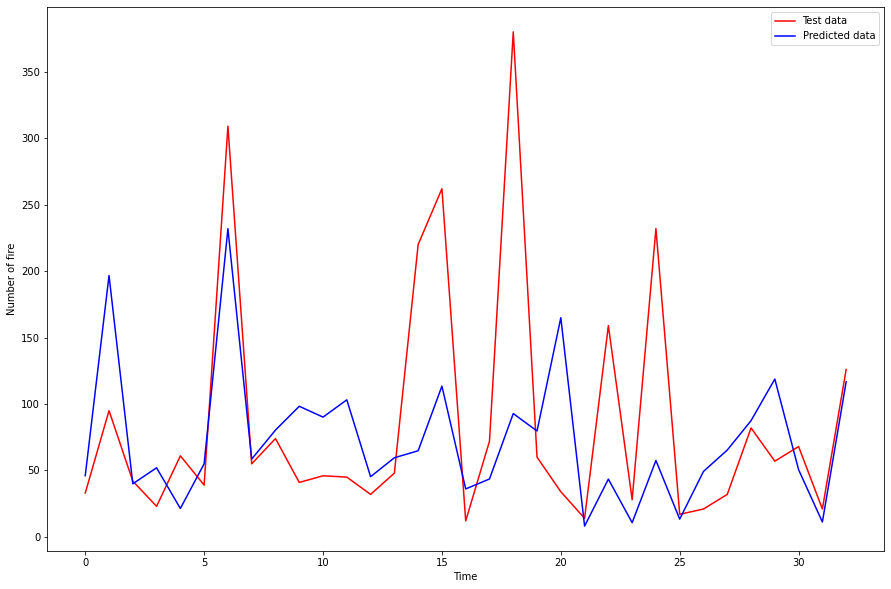

Needs to be tested.
Performance Metric for  Pantanal
RMSE for Pantanal = 923.8613583386731
MAPE for Pantanal = 7.070998671650233
MASE for Pantanal = inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


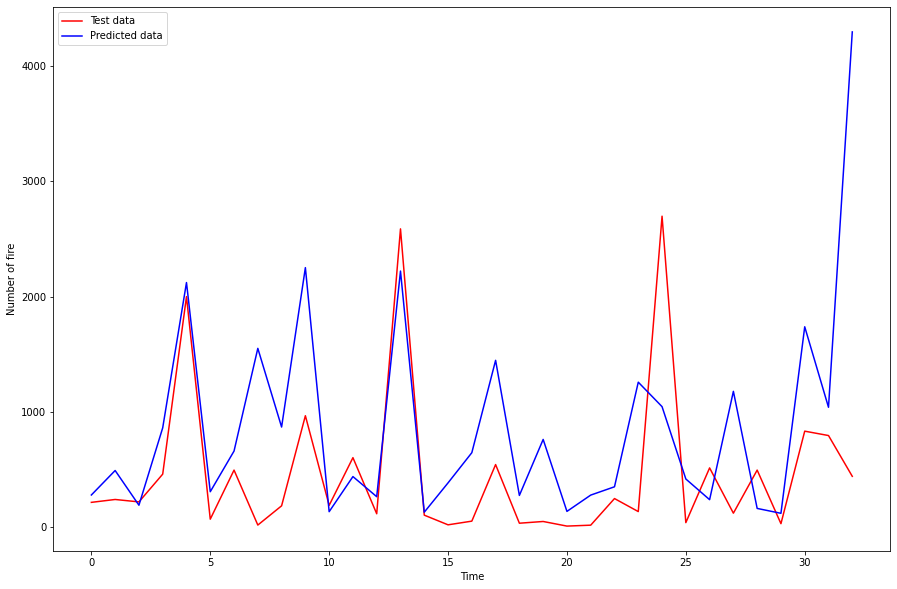

51.85643434524536


In [ ]:
#lstm we rescale value, one hidden layer and 1 dense layer

import time
time_start=time.time()

from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def databiome(data, a):
    data_avg = data.mean()
    scaled_data = a*(data - data_avg)
    return scaled_data
    
def ReScale(data, a):
    data_avg = data.mean()
    scaled_data = a*(data - data_avg)
    return scaled_data

for i in df.columns:
  if i=="mes_ano" :
    continue
  forcasts=[]
  hist=[]
  n_steps = 12
  X_train, y_train= split_sequence(df[i].values.reshape(len(df[i]) , 1), n_steps)
  from sklearn.model_selection import train_test_split
  # split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split( X_train, y_train, train_size=0.70)
  from sklearn.metrics import mean_squared_error
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.layers import LSTM
  from keras.layers import Dropout
  from sklearn.model_selection import train_test_split
  model= Sequential()
  #adding the first LSTM layer and some dropout regularization
  model.add(LSTM(100, activation='relu' , return_sequences=True, input_shape=(X_train.shape[1],1)))
  model.add(LSTM(100, activation='relu'))
  model.add(Dense(1))
  #Compiling the RNN
  model.compile(optimizer='adam', loss= 'mean_squared_error')
  #Fitting the RNN to the training set
  history=model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0)
  for j in df.columns:
    predicted=model.predict(X_test)
    forcasts.append(predicted)
    hist.append(history.history)
  mape = np.mean(np.abs(predicted - y_test)/np.abs(y_test))
  rmse = np.sqrt(mean_squared_error(y_test,predicted))
  #rmse = np.mean((predicted - y_test)**2)**.5
  print("Performance Metric for ",i)
  print("RMSE for", i, '=', rmse)
  print("MAPE for", i, '=', mape)
  print("MASE for", i, '=', mase)
  #plot of test and predict
  plt.figure(figsize=(15, 10))
  plt.plot(y_test, color='red', label='Test data')
  plt.plot(predicted, color='blue', label='Predicted data')
  plt.xlabel('Time')
  plt.ylabel('Number of fire')
  plt.legend()
  #plt.savefig()
  plt.show()
print(time.time()-time_start)